## About Dataset
This data set consists of the marks secured by the students in various subjects.

Example Research Questions:

How effective is the test preparation course? <br>
Which major factors contribute to test outcomes?<br>
What would be the best way to improve student scores on each test?<br>
What patterns and interactions in the data can you find? <br>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats

In [3]:
df = pd.read_csv('Data/exams.csv')

#### 1. Understanding the dataset

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [6]:
df.shape

(1000, 8)

There are 1000 observations (rows) and 8 characteristics( columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are 5 categorical columns and 3 numerical columns

In [8]:
#check the columns in the dataset
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
#Check the statistical characterisitic of the numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.396,15.402871,13.0,56.0,66.5,77.0,100.0
reading score,1000.0,69.002,14.737272,27.0,60.0,70.0,79.0,100.0
writing score,1000.0,67.738,15.600985,23.0,58.0,68.0,79.0,100.0


In [10]:
#Check for the unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [11]:
#To check for distinct values in a specific column:
df['gender'].nunique()

2

In [12]:
df['parental level of education'].nunique()

6

#### 2. Cleaning the data

In [13]:
#Check for nulls
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The data is clean, there are no null values

In [19]:
# drop unnecessary columns for the analysis
df1 = df.drop(['race/ethnicity', 'parental level of education'], axis = 1)
df1.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,male,standard,completed,67,67,63
1,female,free/reduced,none,40,59,55
2,male,free/reduced,none,59,60,50
3,male,standard,none,77,78,68
4,male,standard,completed,78,73,68


#### 3. Analyze the relationship between the variables

In [22]:
df1.corr(numeric_only= True)

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


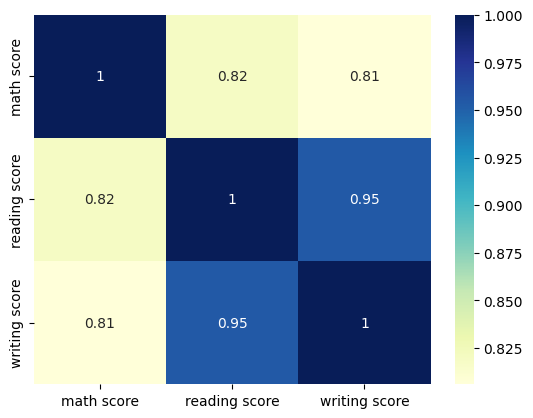

In [27]:
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(numeric_only = True), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

The values are highly correlated

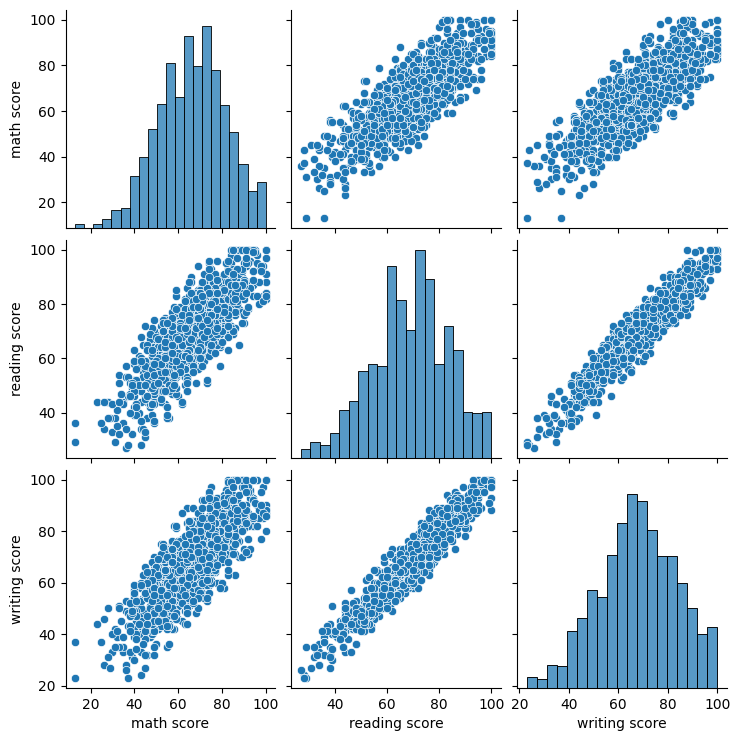

In [33]:
sns.pairplot(df1)

<Axes: xlabel='math score', ylabel='reading score'>

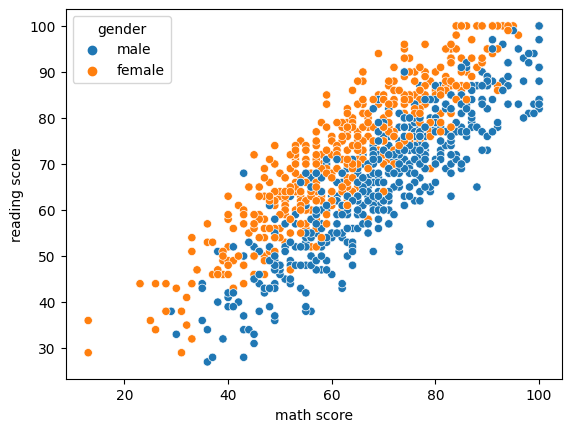

In [37]:
sns.scatterplot( x = 'math score', y= 'reading score', hue='gender', data = df)

Interpretation:
The female students performace is better than males.

<Axes: xlabel='math score', ylabel='reading score'>

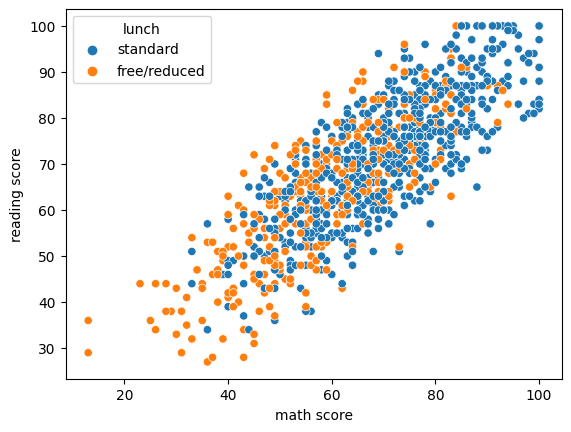

In [41]:
sns.scatterplot( x = 'math score', y= 'reading score', hue='lunch', data = df)

<Axes: xlabel='math score', ylabel='reading score'>

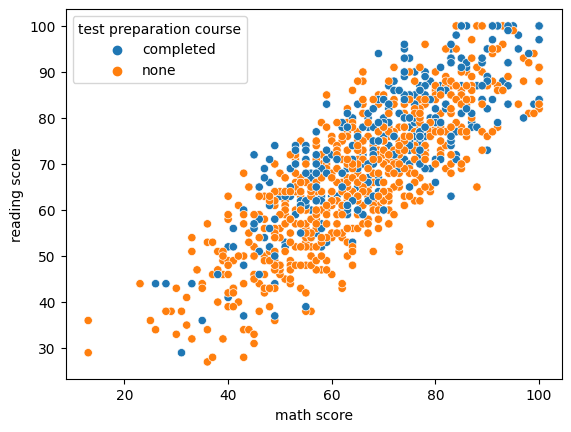

In [44]:
sns.scatterplot( x = 'math score', y= 'reading score', hue='test preparation course', data = df)

In [38]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [55]:
df2 =df1.copy()
df3 = df2.drop( ['gender',  'lunch', 'test preparation course'],axis =1)
import plotly.express as px 
px.histogram(df3)

In [58]:
px.histogram(df['math score'])

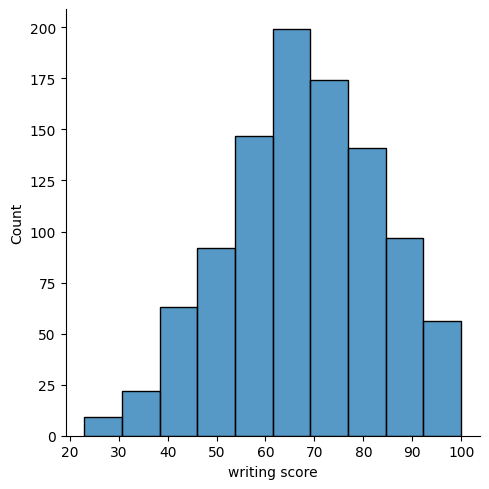

In [66]:
sns.displot(df['writing score'], bins = 10)

In [67]:
px.histogram(df['reading score'])

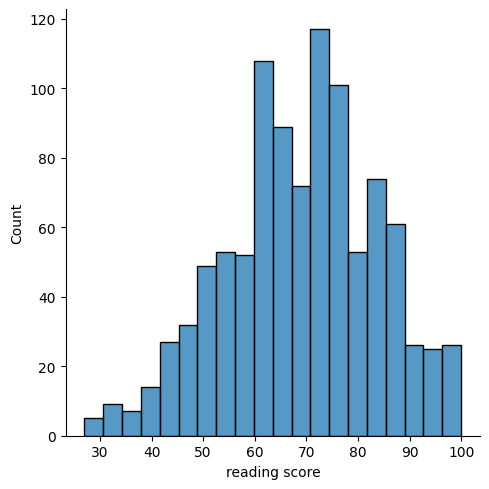

In [69]:
sns.displot(df['reading score'], bins = 20)

In [74]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.396,15.402871,13.0,56.0,66.5,77.0,100.0
reading score,1000.0,69.002,14.737272,27.0,60.0,70.0,79.0,100.0
writing score,1000.0,67.738,15.600985,23.0,58.0,68.0,79.0,100.0


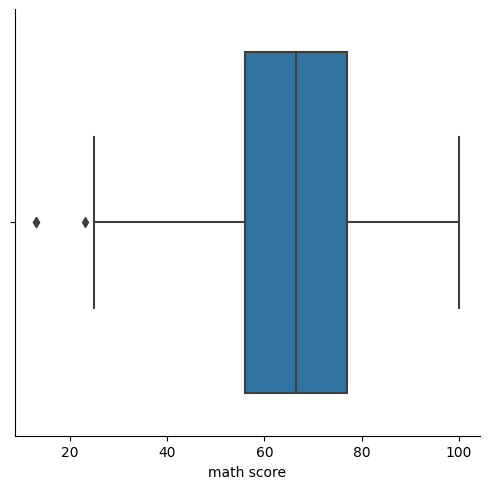

In [71]:
#Boxplot
sns.catplot(x= 'math score', kind ='box', data = df3)

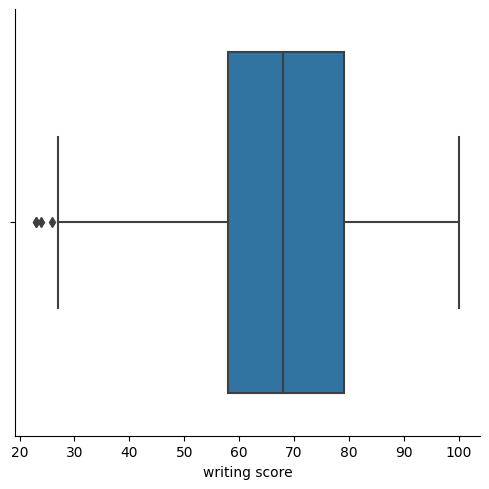

In [72]:
sns.catplot(x= 'writing score', kind ='box', data = df3)

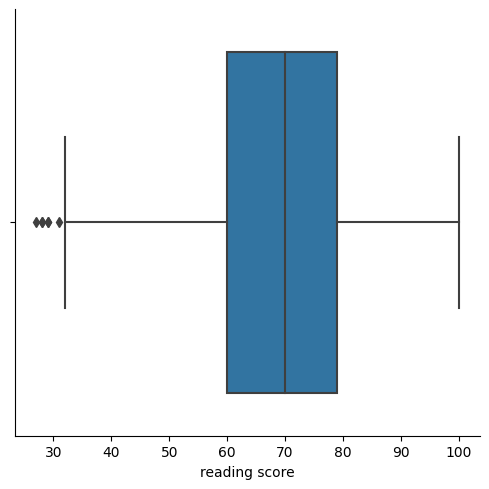

In [73]:
sns.catplot(x= 'reading score', kind ='box', data = df3)

Well, my comments on this one, i kinda understand some concepts as i was following a tutorial but seriously ... Anywei we will get there one step at a time. Cheers!